In [1]:
# example irc belief


# for res_asd figures
import numpy as np
from plot_ult import * 
from scipy import stats 
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import os
import pandas as pd
import numpy as np
from cmaes import CMA
import copy
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pickle
import numpy as np
import torch
import heapq
from torch.distributions.multivariate_normal import MultivariateNormal
from matplotlib import pyplot as plt
import time
from stable_baselines3 import TD3
torch.manual_seed(0)
from numpy import linspace, pi
from InverseFuncs import *
from monkey_functions import *
from firefly_task import ffacc_real
from env_config import Config
# from cma_mpi_helper import run
import ray
from pathlib import Path
arg = Config()
import os
from timeit import default_timer as timer
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score



In [2]:

# set up env
env=ffacc_real.FireFlyPaper(arg)
env.debug=True
env.terminal_vel=0.1
agent_=TD3.load('trained_agent/paper.zip')
agent=agent_.actor.mu.cpu()
phi[0]=1


# run the agent
thetask=[1.8,0.7]
ntrial=1
theta=torch.tensor([[0.5],   
                    [0.7],   
                    [0.9],   
                    [0.9],   
                    [0.9],   
                    [0.9],   
                    [0.13],   
                    [0.9],   
                    [0.9],   
                    [0.1],   
                    [0.1]])
states,actions, beliefs, covs=run_trials(agent=agent, env=env, phi=phi, theta=theta,task=thetask,ntrials=ntrial,pert=None,given_obs=None,return_belief=True)




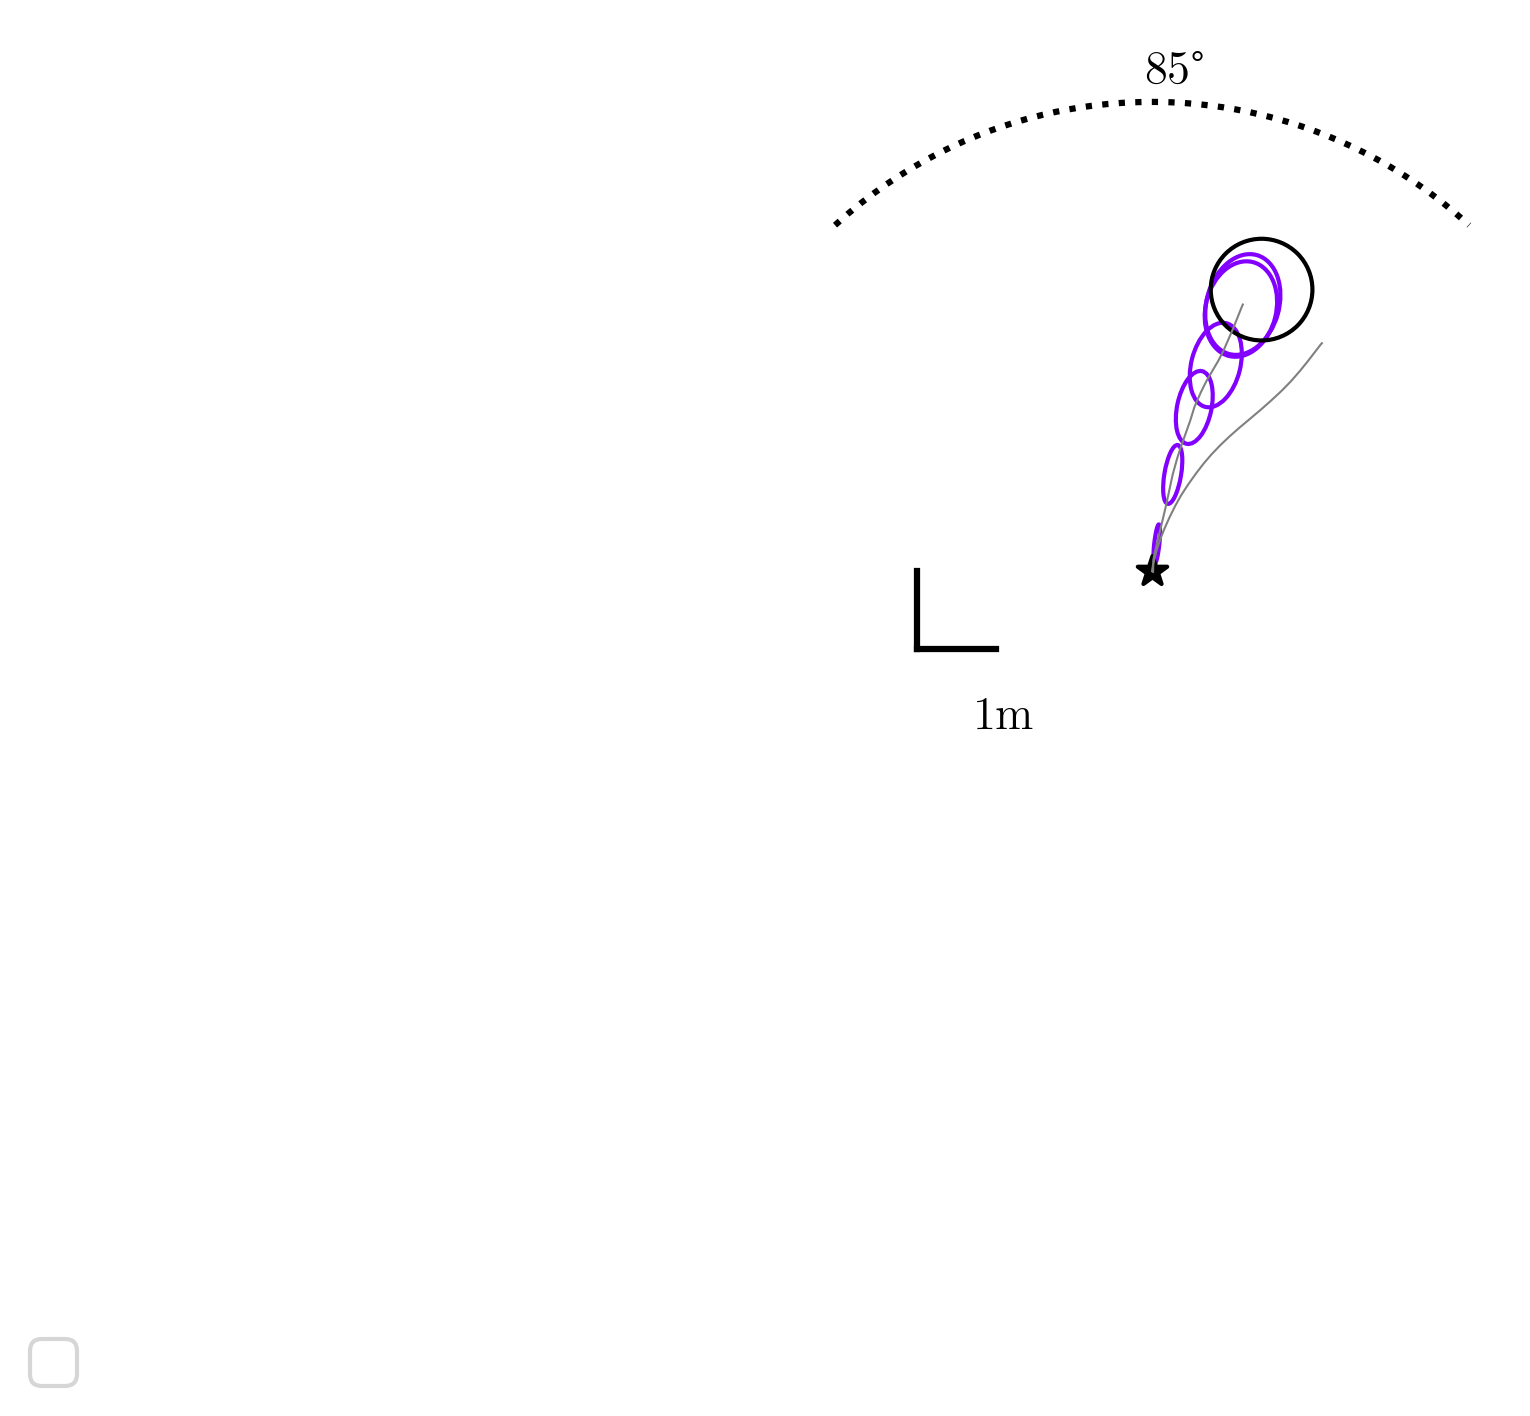

In [3]:

# plot
fontsize=11
alpha=1
every=5
with initiate_plot(3,3, 300) as fig:
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    ax.axes.xaxis.set_ticks([]); ax.axes.yaxis.set_ticks([])
    # ax.set_xlim([-235, 235]); ax.set_ylim([-2, 430])
    xrange=np.cos(pi/180*(90-42.5))*600
    x_temp = np.linspace(-xrange, xrange)
    ax.plot(x_temp, np.sqrt(600**2 - x_temp**2), c='k', ls=':')
    ax.text(-10, 625, s=r'$85\degree$', fontsize=fontsize)

    ax.plot(np.linspace(-300, -200), np.linspace(-100, -100), c='k') # 100 is cm
    ax.plot(np.linspace(-300, -300), np.linspace(-100, 0), c='k')
    ax.text(-230, -200, s=r'$1 m$', fontsize=fontsize)

    # path
    for s in states:
        ax.plot(s[:,1]*200,s[:,0]*200, c='grey',alpha=alpha, linewidth=0.5)
    # ax.scatter(subtasks[:5][:,1]*200,subtasks[:5][:,0]*200)

    # belief path
    for s in beliefs:
        b=s[:,:,0]
        ax.plot(b[:,1]*200,b[:,0]*200, c='grey',alpha=alpha, linewidth=0.5)

    # belief path
    for mus, cs in (zip(beliefs,covs)):
        for t, (mu, cov) in enumerate(zip(mus, cs)):
            if t%every==0 or t==len(mus)-1:
                mu_=torch.tensor([[0,1],[1.,0]])@mu[:2]*200
                cov_=torch.tensor([[0,200],[200.,0]])@cov[:2,:2]@torch.tensor([[0,200],[200.,0]])
                plot_cov_ellipse(cov_, mu_, alpha=1,nstd=2,ax=ax, edgecolor=color_settings['b'])

    # start
    ax.scatter(0,0, marker='*', color='black', s=55) 

    # goal
    plot_circle(np.eye(2)*65,[thetask[1]*200,thetask[0]*200],ax=ax,edgecolor='k')

    ax.axis('equal')
    quickleg(ax)
    quickallspine(ax)
    quicksave('example exaggerated inferred belief path')




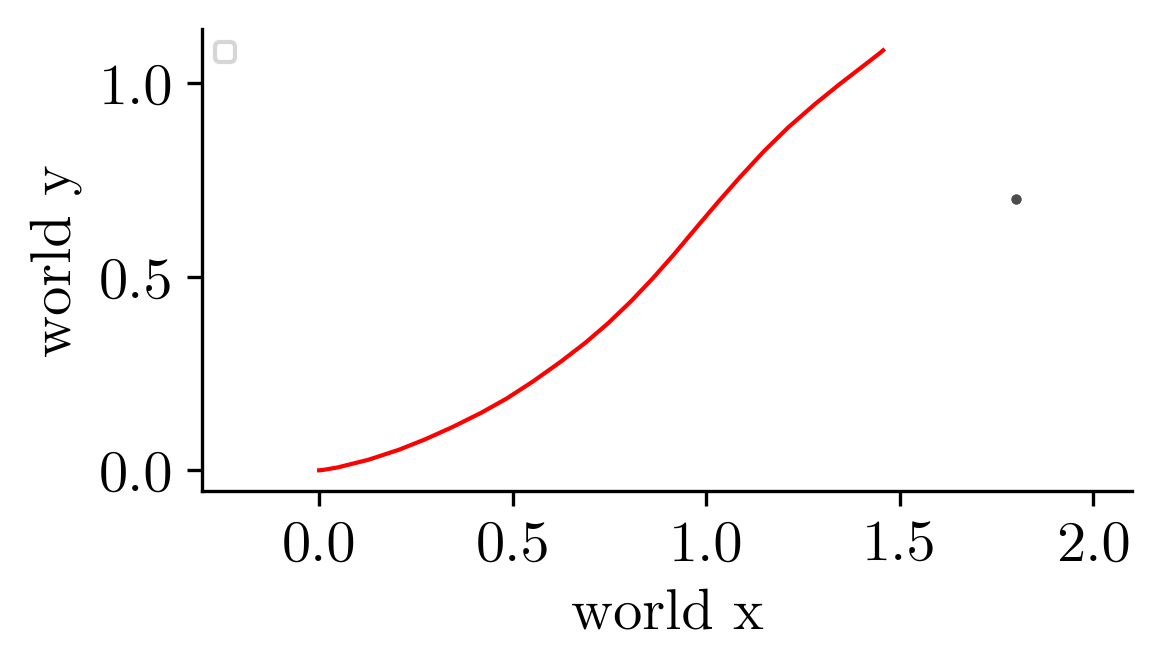

<Figure size 1200x600 with 0 Axes>

In [6]:


ax=quickoverhead_state(states, np.array([thetask]*2), color='r')
ax=quickoverhead_state([beliefs[0][:,:,0]], np.array([thetask]*2), color='k',ax=ax)


In [7]:

with initiate_plot(4, 2, 300) as fig, warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ax = fig.add_subplot(111) if not ax else ax
    for given_state in states:
        ax.plot(given_state[:,0],given_state[:,1],color=color,linewidth=1)
    if goalcircle:
        for eachtask in taskslike:
            ax.add_patch(plt.Circle((eachtask[0],eachtask[1]), 0.13, color=color_settings['goal'], alpha=0.5, edgecolor='none'))
    else:
        ax.scatter(taskslike[:,0],taskslike[:,1],s=2,color=color_settings['goal'])
    ax.axis('equal')
    ax.set_xlabel('world x')
    ax.set_ylabel('world y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(False)
    # legend and label
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(),loc=2, prop={'size': 6})



ValueError: <function color at 0x106014040> is not a valid value for color

<Figure size 1200x600 with 0 Axes>